In [96]:
# грузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [78]:
# грузим данные
stat_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\housing_market_dataset.csv')
stat_data

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Лифт,Ближайшая станция метро,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа
0,https://move.ru/objects/moskva_ulica_baykalska...,"Продажа 1-комнатной квартиры, 31 м², Москва, у...",NaN,NaN,1967.0,NaN,NaN,125,3.0,ВП-738 СВОБОДНАЯ ПРОДАЖА. ДОМ ПОД СНОС. ЮРИДИЧ...,...,NaN,м. Щелковская,1294 м.,ГБОУ школа № 1352,Место в рейтинге №47,"107207,г.Москва, Щелковское ш., д. 77 А",190 м,NaN,NaN,3
1,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 83.2 м², Москва, ...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,202,1.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,да,м. Выставочная,510 м.,ГБОУ школа № 2055,Место в рейтинге №456,"123100, г. Москва, ул. 2-я Черногрязская, дом 7",776 м,Пресненский,14 место из 58 в рейтинге районов,4
2,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 89.6 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,20,1.0,"Продается 2-комн. квартира, площадью 89.6 м2 в...",...,NaN,м. Свиблово,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,2
3,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 55.8 м², Москва, ...","Новостройка «Некрасовка-Парк», 5 кв-л, корп. 1",Сдан,2019.0,Эконом класс,МЦК Шоссе Энтузиастов,15,1.0,Продаётся 2-к квартира площадью 55.8 кв.м. на ...,...,да,м. Лермонтовский проспект,"41 мин, 12 км",ГБОУ школа № 2053,Место в рейтинге №544,"111674, г. Москва, улица Покровская, дом 35",931 м,NaN,NaN,16
4,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,42,3.0,Продаётся 3-к квартира площадью 128 кв.м. на 5...,...,да,м. Тимирязевская,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаю 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 14-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,14
12997,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаем 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,48,1.0,Продается 1-к квартира на 15-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,15
12998,https://move.ru/objects/prodaetsya_2-komnatnay...,"Продам 2-комнатную квартиру, 70 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,60,1.0,Продается 2-к квартира на 2-м этаже 15-этажног...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,2
12999,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продам 1-комнатную квартиру, 41 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 10-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"

In [5]:
# тест времени выполнения разных методов
%%timeit
stat_data.apply(np.mean)

1.87 ms ± 75.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
stat_data.mean(axis=0)

882 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%%timeit
stat_data.apply('mean')

1.02 ms ± 9.19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%%timeit
stat_data.describe().loc['mean']

19.5 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
# выводим инфу о данных (колонки, число строк, типы данных)
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            13001 non-null  object 
 1   Заголовок                      13001 non-null  object 
 2   Новостройка                    6080 non-null   object 
 3   Этап строительства             5812 non-null   object 
 4   Год постройки                  7025 non-null   float64
 5   Класс жилья                    5812 non-null   object 
 6   МЦК                            7633 non-null   object 
 7   Кол-во просмотров              13001 non-null  int64  
 8   Кол-во просмотров сегодня      7224 non-null   float64
 9   Описание                       12263 non-null  object 
 10  Информация                     13001 non-null  object 
 11  Адрес                          13001 non-null  object 
 12  Тип здания                     12897 non-null 

([<matplotlib.patches.Wedge at 0x29b210a2920>,
 [Text(-0.2988419275468078, 1.0586281227797176, 'Бизнес класс'),
  Text(-0.007729705272563642, -1.09997284132673, 'Комфорт класс'),
  Text(1.0224122924315437, -0.4057993399266142, 'Элит класс'),
  Text(1.094969317687206, -0.10508184107453877, 'Эконом класс')])

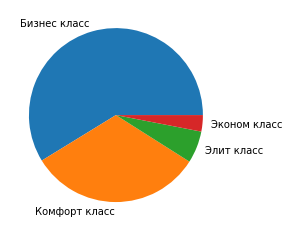

In [63]:
# строим круговую диаграмму колонки, подсчитывая число каждого знчения 
plt.pie(stat_data['Класс жилья'].value_counts().values, labels=stat_data['Класс жилья'].value_counts().index)

In [21]:
# дальше 3 строчки вывод отдельных значений и их числа в колонке (нужно было для задания на курсах)
(stat_data['Класс жилья'] == 'Элит класс').sum()

345

In [22]:
(stat_data['Класс жилья'] == 'Комфорт класс').sum()

1875

In [29]:
stat_data['Площадь кухни'].isna().sum()

1180

In [32]:
# следующие 2 строки - подсчёт числа значений в колонке 
stat_data['Тип объекта'].value_counts()

квартира       12849
студия           112
апартаменты       36
пентхаус           4
Name: Тип объекта, dtype: int64

In [33]:
stat_data['Этап строительства'].value_counts()

Возведение стен    3213
Сдан               1050
Отделка             803
Площадка            541
В проекте           160
Котлован             41
Заморожено            4
Name: Этап строительства, dtype: int64

<BarContainer object of 10 artists>

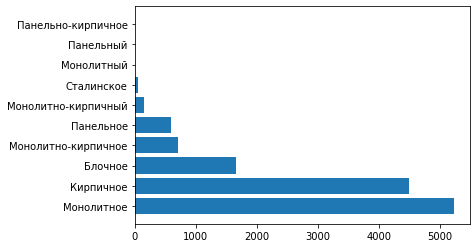

In [6]:
# перевёрнутая стобчатая диаграмма колонки (чтобы индексы удобно читались)
plt.barh(stat_data['Тип здания'].value_counts().index, stat_data['Тип здания'].value_counts().values)

<AxesSubplot:>

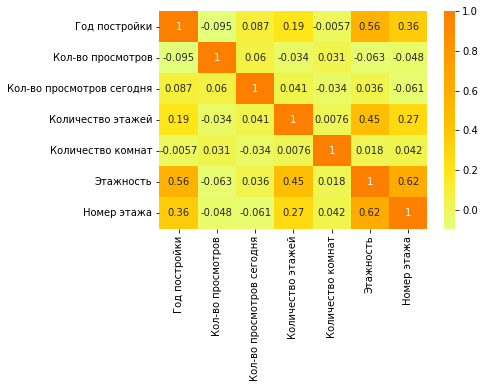

In [9]:
# тепловая карта корреляций колонок друг с другом
corr = stat_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
#  дальше идут 3 способа преобразования колонки с буквенно-численными значениями в численные
# через апплай, лямбду, списочное выражение, джоин и издиджит (топ по быстродействию)
stat_data['Цена'].apply(lambda x: int(''.join([i for i in x if i.isdigit()])))

In [ ]:
# через функцию и регулярные выражения
def clear_price(price):
  return int(re.sub('\D', '', price))
stat_data['price_for_sqr'] = stat_data['Цена'].apply(clear_price)

In [85]:
# как первый + регулярные выражения
stat_data['price_for_sqr'] = stat_data['цена за м²'].apply(lambda x: int(re.sub("\D", "", x)))

In [93]:
# сортировка колонки по возрастанию числового значения
sorted_stat_data = stat_data.sort_values('price_for_sqr', ascending=True)
sorted_stat_data

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа,price_for_sqr,price
10913,https://move.ru/objects/moskva_ulica_krylatski...,"Продажа 2-комнатной квартиры, 136 м², Москва, ...",NaN,NaN,1997.0,NaN,NaN,1053,1.0,"Продается 2к-квартира с машиноместом, располож...",...,962 м.,ГБОУ школа № 1133,Место в рейтинге №410,"121609, г. Москва, улица Крылатские холмы, дом...",132 м,Крылатское,20 место из 58 в рейтинге районов,10,4499,612000
10914,https://move.ru/objects/moskva_ulica_krylatski...,"Продаем квартиру, 410 м², Москва, улица Крылат...",NaN,NaN,1997.0,NaN,NaN,1049,1.0,Продается двухуровневая 8к-квартира c двумя ма...,...,962 м.,ГБОУ школа № 1133,Место в рейтинге №410,"121609, г. Москва, улица Крылатские холмы, дом...",132 м,Крылатское,20 место из 58 в рейтинге районов,10,4499,1845000
10940,https://move.ru/objects/moskva_ulica_krylatski...,"Продается 6-комнатная квартира, 274 м², Москва...",NaN,NaN,1997.0,NaN,NaN,1008,1.0,Продается двухуровневая 6к-квартира с машиноме...,...,962 м.,ГБОУ школа № 1133,Место в рейтинге №410,"121609, г. Москва, улица Крылатские холмы, дом...",132 м,Крылатское,20 место из 58 в рейтинге районов,10,4499,1233000
11272,https://move.ru/objects/moskva_ulica_mytnaya_d...,"Продам 4-комнатную квартиру, 125 м², Москва, у...","ЖК «Английский квартал», м. Октябрьская",Сдан,2013.0,Бизнес класс,NaN,291,2.0,"Продаю 4-х комнатную квартиру, м. Серпуховская...",...,"10 мин, 870 м",ГБОУ гимназия № 1257,Место в рейтинге №314,"115093, г. Москва, ул. Павловская, дом 8 А",778 м,Замоскворечье,5 место из 58 в рейтинге районов,5,7199,900000
10107,https://move.ru/objects/dvuhkomnatnaya_kvartir...,"Продам 2-комнатную квартиру, 160 м², Москва, 4...",NaN,NaN,NaN,NaN,МЦК Шелепиха,608,2.0,Продажа 2-х комнатной элитной квартиры с машин...,...,486 м.,ГБОУ ДО ДТДМ на Миуссах,Место в рейтинге №677,"125047, г. Москва, ул. Александра Невского, д. 4",351 м,Тверской,4 место из 58 в рейтинге районов,4,7500,1200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,https://move.ru/objects/elitnaya_kvartira_v_ti...,"Продается 3-комнатная квартира, 153 м², Москва...","Новостройка в пер. Печатников, д. 12-14, м. Су...",Сдан,NaN,Элит класс,МЦК Деловой центр,518,1.0,В клубном доме предлагается к продаже двухуров...,...,352 м.,ГБОУ школа № 2054,Место в рейтинге №6,"127051, г. Москва, ул. Трубная, д. 36",779 м,NaN,NaN,3,1282946,196290705
8317,https://move.ru/objects/jk_polyanka44-_146_kvm...,"Продаю 3-комнатную квартиру, 146 м², Москва, у...","ЖК «Полянка, 44», м. Октябрьская",Отделка,NaN,Элит класс,МЦК Площадь Гагарина,114,1.0,"Очень высокий второй этаж, как третий! Предлаг...",...,437 м.,ГБОУ Многопрофильный лицей № 1799,Место в рейтинге №5,"115035, г. Москва, 1-й Кадашевский пер., д. 3,...",698 м,Якиманка,7 место из 58 в рейтинге районов,2,1292877,188760000
10124,https://move.ru/objects/prodam_mnogokomnatnuyu...,"Продается квартира, 418.6 м², Москва, улица Ос...",NaN,NaN,NaN,NaN,МЦК Лужники,132,1.0,Предлагается в продажу семикомнатная квартира ...,...,566 м.,ГБОУ гимназия № 1529,Место в рейтинге №38,"119034, город Москва, 2-й Обыденский переулок,...",248 м,Хамовники,1 место из 58 в рейтинге районов,4,1433349,600000000
5353,https://move.ru/objects/moskva_bogoslovskiy_pe...,"Продаем 3-комнатную квартиру, 200 м², Москва, ...","ЖК «Сытинский», м. Пушкинская",Сдан,2011.0,Элит класс,NaN,874,1.0,Продается квартира в центральном округе города...,...,"6 мин, 480 м",ГБОУ школа № 2123 им. М. Эрнандеса,Место в рейтинге №87,"121069, г. Москва, Столовый пер., д.10/2, стр.1",221 м,NaN,NaN,8,1800000,360000000


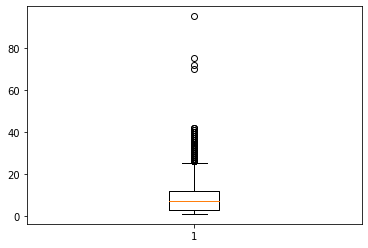

In [72]:
# просто ящик с усами для колонки
plt.boxplot(stat_data['Номер этажа'])
plt.show()

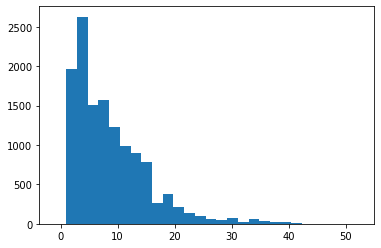

In [74]:
# гистограмма колонки, ограниченная по оси Х с заданной шириной столбцов
plt.hist(stat_data['Номер этажа'], bins = 50)
plt.xlim((None,55))
plt.show()

In [76]:
# процентили (для отсеивания выбросов/нерелевантных крайних значений по % от всего распределения)
percentile_10_value = stat_data['Год постройки'].quantile(0.10)
percentile_25_value = stat_data['Год постройки'].quantile(0.25)

In [ ]:
# группировка значений одной колонки по значениям другой и применение к ним метода (медиана в данном случае)

In [95]:
stat_data.groupby('Класс жилья')['price_for_sqr'].median()

Класс жилья
Бизнес класс     220000.0
Комфорт класс    115301.0
Эконом класс     154955.0
Элит класс       307432.0
Name: price_for_sqr, dtype: float64

In [69]:
# то же, что выше + небольшое описание основных показателей
stat_data.groupby('Класс жилья')['Тип здания'].describe()

,count,unique,top,freq
Класс жилья,,,,
Бизнес класс,3415,7,Монолитное,1818
Комфорт класс,1875,6,Монолитное,1565
Эконом класс,177,7,Монолитное,50
Элит класс,345,6,Монолитно-кирпичный,128


sns.boxplot(x='Тип здания', y="price_for_sqr", data=stat_data)
plt.axis(ymin=0, ymax=1100000)

(-0.5, 3.5, 0.0, 1500000.0)

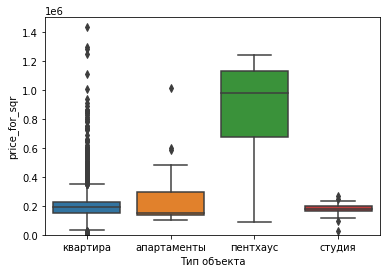

In [68]:
# боксплоты цены за кв.м. по типам объектов (категориальные по Х) с заданным масштабом для удобства 
sns.boxplot(x='Тип объекта', y="price_for_sqr", data=stat_data)
plt.axis(ymin=0, ymax=1500000)

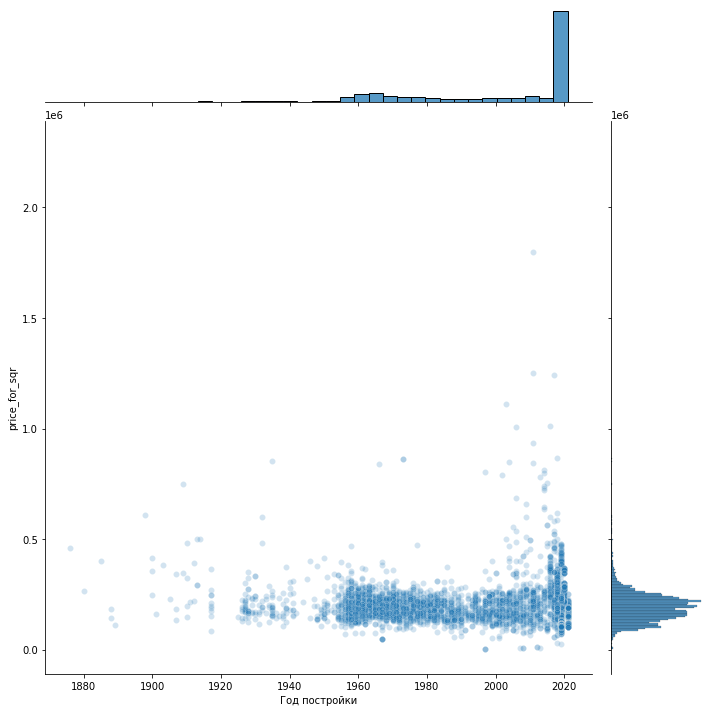

In [97]:
# совмещённые графики скаттерплот и столбчатых диаграмм для 2х столбцов по осям
sns.jointplot(x=stat_data["Год постройки"], y=stat_data["price_for_sqr"],size=10, alpha=0.2)

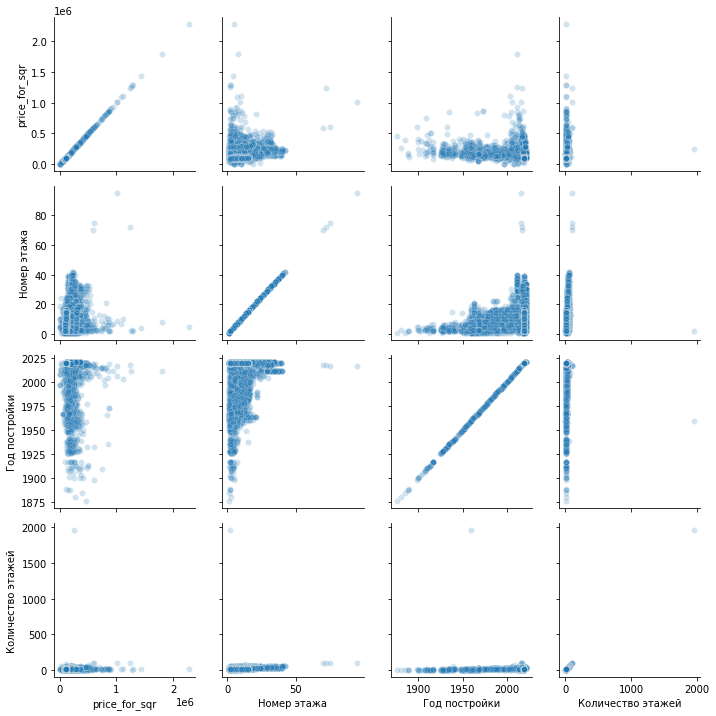

In [27]:
# парные графики выбранных колонок. Применяется метод 'map', который применяет скаттерплот ко всем графикам
columns = ['price_for_sqr','Номер этажа', 'Год постройки', 'Количество этажей']
sns.PairGrid(stat_data[columns]).map(sns.scatterplot, alpha=0.2)

In [21]:
# создаём копию основного датафрейма и поочердёно убираем значения выбранных выше колонок, чей квантиль выше 0.99 в распределении
new_dataset = stat_data
new_dataset = [new_dataset[new_dataset[col] <= new_dataset[col].quantile(0.99)] for col in columns]

In [30]:
# то же самое, только в 3 строки и с записью в переменную limiter
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter]

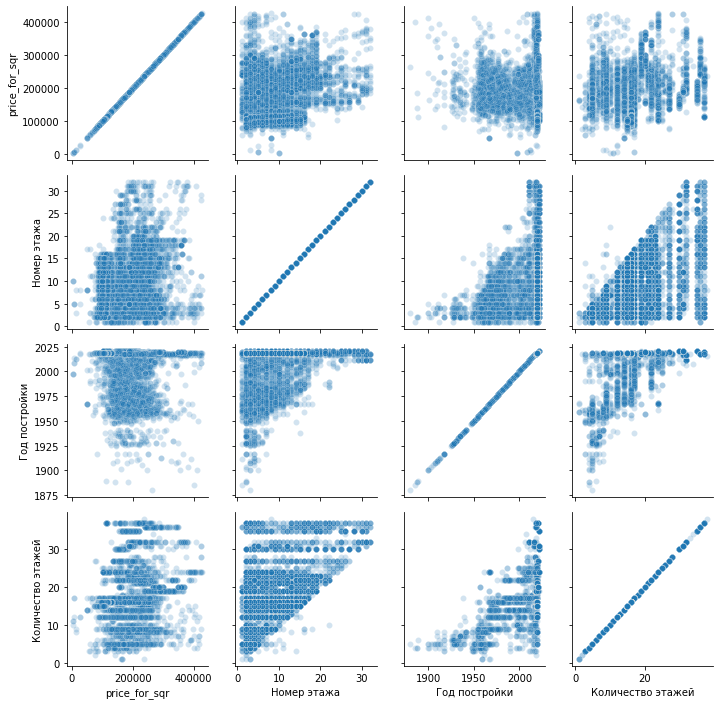

In [31]:
# строим парные графики выбранных колонок, без 99% квантиля, который убрали выше из копии датафрейма
sns.PairGrid(new_dataset[columns]).map(sns.scatterplot, alpha=0.2)

In [47]:
# выводим уникальные элементы колонки и в следующей строке срезом убираем значение 'nan' из списка
flat_types = stat_data['Класс жилья'].unique()
flat_types

array([nan, 'Элит класс', 'Бизнес класс', 'Эконом класс', 'Комфорт класс'],
      dtype=object)

In [48]:
flat_types = flat_types[1:]

In [52]:
# присваиваем уникальные значения колонки переменной, зипуем переменную + параметры цветов (обрезаны по длине - числу
# переменной) и создаём словарь, присваивая его переменной. Типа здания - ключ, параметр цвета - значение в словаре.
labels = stat_data['Тип здания'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'Панельное': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Монолитно-кирпичный': (0.6823529411764706,
  0.7803921568627451,
  0.9098039215686274),
 'Монолитное': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Монолитный': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Кирпичное': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 nan: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Блочное': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Монолитно-кирпичное': (1.0, 0.596078431372549, 0.5882352941176471),
 'Сталинское': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Панельный': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Панельно-кирпичное': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354)}

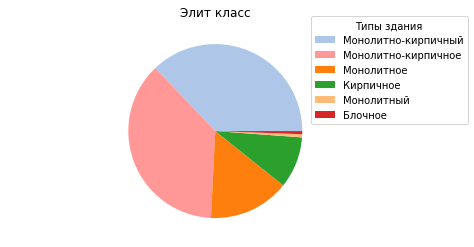

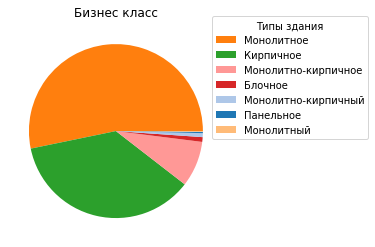

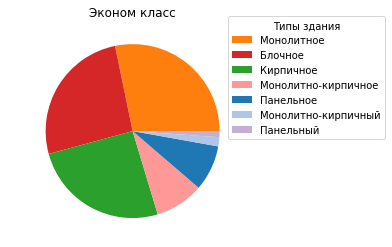

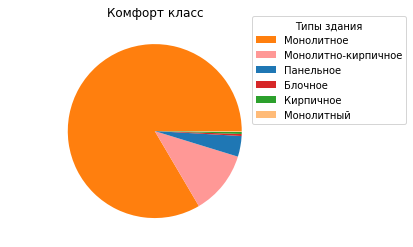

In [112]:
# перебираем созданный выше список уникальных значений класса жилья
for flat_type in flat_types: 
#     создаём новый датафрейм, добавляем в него все сведения по каждому значению из иттерируемого списка
  df = stat_data[stat_data['Класс жилья']==flat_type]
# присваиваем переменной число каждого значения в колонке Тип здания
  class_counts = df['Тип здания'].value_counts()
#     присваиваем переменной индексы (названия всех значений) из переменной выше
  labels = class_counts.index
# отрисовываем круговые диаграммы колонок из списка flat_type
  plt.title(flat_type)
#    указываем тип диаграммы, передаём в неё параметры (значения колонки Тип здания, лэйблы-ключи и цвета к ним из словаря) 
  patches, texts = plt.pie(
      class_counts.values, 
      labels = labels, 
      colors = [colors[key] for key in labels],
      textprops=dict(color="w") 
      )
#    задаём легенду с перечислением титла, её локация размещения, настройка местоположения самой легенды
  plt.legend(patches, labels, title="Типы здания", loc="upper center", bbox_to_anchor=(1.05, 0.05, 0.5, 1)) 
# нужна этакоманда, чтобы отрисовать сразу несклько графиков при переборе  
  plt.show()

In [ ]:
# Больше методов визуализации
# https://habr.com/ru/post/468295/

In [80]:
# фильтр датафрейма по определенным нескольким значениям в столбце
stat_data[stat_data['Район'].isin(['Строгино', 'Щукино'])]

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Лифт,Ближайшая станция метро,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа
142,https://move.ru/objects/volokolamskoe_shosse_d...,"Продам 4-комнатную квартиру, 150 м², Москва, В...",NaN,NaN,NaN,NaN,МЦК Стрешнево,303,1.0,СВОБОДНАЯ ПРОДАЖА. Продам 4-х комнатную кварти...,...,NaN,м. Щукинская,"19 мин, 1,6 км",ГБОУ школа № 1005 «Алые паруса»,Место в рейтинге №529,"123182, город Москва, улица Авиационная, дом 7...",~ 1.3 км,Щукино,17 место из 58 в рейтинге районов,1
232,https://move.ru/objects/moskva_ulica_marshala_...,"Продается 4-комнатная квартира, 100 м², Москва...",NaN,NaN,1958.0,NaN,МЦК Панфиловская,57,NaN,Дом кирпичный. Лифт есть. Двор закрытый. Свобо...,...,да,м. Октябрьское поле,500 м.,ГАУДО «Домисолька»,Место в рейтинге №687,"123298, г. Москва, ул. Маршала Бирюзова, д. 5",156 м,Щукино,17 место из 58 в рейтинге районов,4
247,https://move.ru/objects/moskva_ulica_raspletin...,"Продам 4-комнатную квартиру, 190 м², Москва, у...",NaN,NaN,2000.0,NaN,МЦК Панфиловская,179,1.0,ВП-717 СВОБОДНАЯ ПРОДАЖА! В СОБСТВЕННОСТИ БОЛЕ...,...,да,м. Октябрьское поле,"8 мин, 670 м",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",669 м,Щукино,17 место из 58 в рейтинге районов,7
248,https://move.ru/objects/moskva_ulica_raspletin...,"Продажа 5-комнатной квартиры, 190 м², Москва, ...",NaN,NaN,2000.0,NaN,МЦК Панфиловская,187,2.0,ВП-717 СВОБОДНАЯ ПРОДАЖА! В СОБСТВЕННОСТИ БОЛЕ...,...,да,м. Октябрьское поле,"8 мин, 670 м",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",669 м,Щукино,17 место из 58 в рейтинге районов,7
335,https://move.ru/objects/moskva_ulica_tallinska...,"Продаем 3-комнатную квартиру, 80 м², Москва, у...",NaN,NaN,1982.0,NaN,NaN,157,2.0,ВП-727 СВОБОДНАЯ ПРОДАЖА. 1 ВЗРОСЛЫЙ СОБСТВЕНН...,...,да,м. Строгино,749 м.,ГБОУ школа № 705,Место в рейтинге №363,"123592, г. Москва, ул. Кулакова, д.25, корп.2 .",498 м,Строгино,30 место из 58 в рейтинге районов,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11006,https://move.ru/objects/moskva_ulica_berzarina...,"Продаю 4-комнатную квартиру, 116 м², Москва, у...","ЖК «Родной Город. Октябрьское Поле», м. Октябр...",Сдан,2017.0,Бизнес класс,МЦК Панфиловская,11,1.0,"Дом сдан в 2017, готовая новая 4-к квартира. Э...",...,да,м. Октябрьское поле,"21 мин, 1,8 км",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",532 м,Щукино,17 место из 58 в рейтинге районов,11
11007,https://move.ru/objects/moskva_ulica_berzarina...,"Продаем 1-комнатную квартиру, 42 м², Москва, у...",NaN,NaN,2017.0,NaN,МЦК Панфиловская,11,1.0,"Дом сдан. Комната 19,13 м2, кухня 11,32 м2, эт...",...,да,м. Октябрьское поле,1154 м.,ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",485 м,Щукино,17 место из 58 в рейтинге районов,5
11008,https://move.ru/objects/moskva_ulica_berzarina...,"Продаем 1-комнатную квартиру, 43 м², Москва, у...","ЖК «Родной Город. Октябрьское Поле», м. Октябр...",Сдан,2017.0,Бизнес класс,МЦК Панфиловская,11,1.0,"Дом сдан. Комната 18,67 м2, кухня 10,82 м2, эт...",...,да,м. Октябрьское поле,"21 мин, 1,8 км",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",574 м,Щукино,17 место из 58 в рейтинге районов,10
11009,https://move.ru/objects/moskva_ulica_berzarina...,"Продаем 1-комнатную квартиру, 46 м², Москва, у...","ЖК «Родной Город. Октябрьское Поле», м. Октябр...",Сдан,2017.0,Бизнес класс,МЦК Панфиловская,11,1.0,"Дом сдан, готовая новая 1-к квартира. Комната ...",...,да,м. Октябрьское поле,"21 мин, 1,8 км",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",574 м,Щукино,17 место из 58 в рейтинге районов,14


In [81]:
# фильтр датафрейма по определенному одному значению в колонке
stat_data[stat_data['Этап строительства'] == 'Сдан']

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Лифт,Ближайшая станция метро,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа
3,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 55.8 м², Москва, ...","Новостройка «Некрасовка-Парк», 5 кв-л, корп. 1",Сдан,2019.0,Эконом класс,МЦК Шоссе Энтузиастов,15,1.0,Продаётся 2-к квартира площадью 55.8 кв.м. на ...,...,да,м. Лермонтовский проспект,"41 мин, 12 км",ГБОУ школа № 2053,Место в рейтинге №544,"111674, г. Москва, улица Покровская, дом 35",931 м,NaN,NaN,16
4,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,42,3.0,Продаётся 3-к квартира площадью 128 кв.м. на 5...,...,да,м. Тимирязевская,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,5
5,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продам 3-комнатную квартиру, 126.7 м², Москва,...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,38,2.0,Продаётся 3-к квартира площадью 126.7 кв.м. на...,...,да,м. Тимирязевская,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,19
6,https://move.ru/objects/moskva_novovatutinskiy...,"Продажа 1-комнатной квартиры, 38 м², Троицк, Н...","ЖК «Новые Ватутинки», мкр. Центральный, корп. 9",Сдан,NaN,Эконом класс,NaN,4267,1.0,"""Новые Ватутинки"" (микрорайон Центральный) - э...",...,да,м. Бунинская Аллея,"1 ч 19 мин, 31 км",ГБОУ гимназия № 1786,Место в рейтинге №555,"117041, г.Москва, ул. Адмирала Лазарева, д. 77",~ 9.5 км,NaN,NaN,12
7,https://move.ru/objects/moskva_novovatutinskiy...,"Продаю 2-комнатную квартиру, 62 м², Троицк, Но...","ЖК «Новые Ватутинки», мкр. Центральный, корп. 9",Сдан,NaN,Эконом класс,NaN,4408,3.0,В первую очередь при проектировании микрорайон...,...,да,м. Бунинская Аллея,"1 ч 19 мин, 31 км",ГБОУ гимназия № 1786,Место в рейтинге №555,"117041, г.Москва, ул. Адмирала Лазарева, д. 77",~ 9.5 км,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,https://move.ru/objects/prodaetsya_1-komn_kvar...,"Продаю 1-комнатную квартиру, 45.5 м², Москва, ...","ЖК «Лобачевский», д. 118, корп. 2, м. Проспект...",Сдан,2021.0,Бизнес класс,МЦК Кутузовская,228,27.0,Квартира бизнес-класса в престижном ЗАО! Жилой...,...,да,м. Раменки,1898 м.,ГБПОУ ПТ № 2,Место в рейтинге №557,"119021, г. Москва, ул.Тимура Фрунзе, д.28",884 м,Раменки,37 место из 58 в рейтинге районов,12
12210,https://move.ru/objects/prodaetsya_1-komn_kvar...,"Продается 1-комнатная квартира, 45.5 м², Москв...","ЖК «Лобачевский», д. 118, корп. 2, м. Проспект...",Сдан,2021.0,Бизнес класс,МЦК Кутузовская,242,15.0,Квартира бизнес-класса в престижном ЗАО! Жилой...,...,да,м. Раменки,1898 м.,ГБПОУ ПТ № 2,Место в рейтинге №557,"119021, г. Москва, ул.Тимура Фрунзе, д.28",884 м,Раменки,37 место из 58 в рейтинге районов,5
12519,https://move.ru/objects/prodaetsya_1-komn_kvar...,"Продаю 1-комнатную квартиру, 45.5 м², Москва, ...","ЖК «Лобачевский», д. 118, корп. 2, м. Проспект...",Сдан,2021.0,Бизнес класс,МЦК Кутузовская,230,26.0,Квартира бизнес-класса в престижном ЗАО! Жилой...,...,да,м. Раменки,1898 м.,ГБПОУ ПТ № 2,Место в рейтинге №557,"119021, г. Москва, ул.Тимура Фрунзе, д.28",884 м,Раменки,37 место из 58 в рейтинге районов,12
12520,https://move.ru/objects/prodaetsya_1-komn_kvar...,"Продается 1-комнатная квартира, 45.5 м², Москв...","ЖК «Лобачевский», д. 118, корп. 2, м. Проспект...",Сдан,2021.0,Бизнес класс,МЦК Кутузовская,246,28.0,Квартира бизнес-класса в престижном ЗАО! Жилой...,...,да,м. Раменки,1898 м.,ГБПОУ ПТ № 2,Место в рейтинге №557,"119021, г. Москва, ул

In [83]:
# фильтр датафрейма с отрицанием(оставляет значения кроме тех из колонки, что указаны)
stat_data[~(stat_data['Этап строительства'].isin(['Котлован', 'Заморожено']))]

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Лифт,Ближайшая станция метро,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа
0,https://move.ru/objects/moskva_ulica_baykalska...,"Продажа 1-комнатной квартиры, 31 м², Москва, у...",NaN,NaN,1967.0,NaN,NaN,125,3.0,ВП-738 СВОБОДНАЯ ПРОДАЖА. ДОМ ПОД СНОС. ЮРИДИЧ...,...,NaN,м. Щелковская,1294 м.,ГБОУ школа № 1352,Место в рейтинге №47,"107207,г.Москва, Щелковское ш., д. 77 А",190 м,NaN,NaN,3
1,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 83.2 м², Москва, ...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,202,1.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,да,м. Выставочная,510 м.,ГБОУ школа № 2055,Место в рейтинге №456,"123100, г. Москва, ул. 2-я Черногрязская, дом 7",776 м,Пресненский,14 место из 58 в рейтинге районов,4
2,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 89.6 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,20,1.0,"Продается 2-комн. квартира, площадью 89.6 м2 в...",...,NaN,м. Свиблово,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,2
3,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 55.8 м², Москва, ...","Новостройка «Некрасовка-Парк», 5 кв-л, корп. 1",Сдан,2019.0,Эконом класс,МЦК Шоссе Энтузиастов,15,1.0,Продаётся 2-к квартира площадью 55.8 кв.м. на ...,...,да,м. Лермонтовский проспект,"41 мин, 12 км",ГБОУ школа № 2053,Место в рейтинге №544,"111674, г. Москва, улица Покровская, дом 35",931 м,NaN,NaN,16
4,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,42,3.0,Продаётся 3-к квартира площадью 128 кв.м. на 5...,...,да,м. Тимирязевская,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаю 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 14-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,14
12997,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаем 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,48,1.0,Продается 1-к квартира на 15-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,15
12998,https://move.ru/objects/prodaetsya_2-komnatnay...,"Продам 2-комнатную квартиру, 70 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,60,1.0,Продается 2-к квартира на 2-м этаже 15-этажног...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,2
12999,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продам 1-комнатную квартиру, 41 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 10-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"

In [ ]:
# перевод столбца в интеджер тип, затем фильтр датафрейма по значениям в столбце выше определенного значения (условие)

In [90]:
stat_data['price'] = stat_data['Цена'].apply(lambda x: int(re.sub("\D", "", x)))
stat_data[stat_data['price']>10000000]

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа,price_for_sqr,price
1,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 83.2 м², Москва, ...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,202,1.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,510 м.,ГБОУ школа № 2055,Место в рейтинге №456,"123100, г. Москва, ул. 2-я Черногрязская, дом 7",776 м,Пресненский,14 место из 58 в рейтинге районов,4,268000,22297600
2,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 89.6 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,20,1.0,"Продается 2-комн. квартира, площадью 89.6 м2 в...",...,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,2,174786,15660826
4,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,42,3.0,Продаётся 3-к квартира площадью 128 кв.м. на 5...,...,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,5,212270,27170560
5,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продам 3-комнатную квартиру, 126.7 м², Москва,...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,38,2.0,Продаётся 3-к квартира площадью 126.7 кв.м. на...,...,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,19,203454,25777622
12,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаем 3-комнатную квартиру, 89.2 м², Москва,...","ЖК «Дом на Рогожском Валу», корп. 2, м. Римская",Сдан,2017.0,Бизнес класс,МЦК Угрешская,130,1.0,"Для тех, кто привык к самому лучшему, и ценит ...",...,530 м.,ГБУ «Лаборатория путешествий»,Место в рейтинге №636,"109147, г. Москва, ул. Нижегородская, д. 3",285 м,NaN,NaN,3,403587,36000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12828,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 87.3 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,190,18.0,"Продается 2-комн. квартира, площадью 87.3 кв. ...",...,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,13,189125,16510613
12829,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаем 2-комнатную квартиру, 77.9 м², Москва,...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,48,22.0,"Продается 2-комн. квартира, площадью 77.9 м2 в...",...,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,11,198042,15427472
12930,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 110.7 м², Москва,...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,208,25.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,510 м.,ГБОУ школа № 2055,Место в рейтинге №456,"123100, г. Москва, ул. 2-я Черногрязская, дом 7",776 м,Пресненский,14 место из 58 в рейтинге районов,2,275000,30442500
12931,https://move.ru/objects/prodaetsya_1-komn_kvar...,"Продам 1-комнатную квартиру, 65 м², Москва, Ма...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,172,8.0,Квартира премиум класса

In [91]:
# фильтр датафрейма по двум условиям (быть в списке И значение из определенной колонки больше заданного(условие))
stat_data[(stat_data['Район'].isin(['Строгино', 'Щукино', 'Хорошёвский'])) & (stat_data['Год постройки']>2010)]

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа,price_for_sqr,price
15,https://move.ru/objects/moskva_shosse_horoshev...,"Продаем 2-комнатную квартиру, 58.4 м², Москва,...","ЖК «Династия», м. Полежаевская",Возведение стен,2019.0,Бизнес класс,NaN,1040,1.0,Продается двухкомнатная квартира площадью 58.4...,...,"8 мин, 660 м",ГБОУ школа № 1288,Место в рейтинге №105,"123007, Москва, Хорошевское ш., д. 3",213 м,Хорошёвский,32 место из 58 в рейтинге районов,13,150685,8800000
16,https://move.ru/objects/moskva_shosse_horoshev...,"Продается 2-комнатная квартира, 63.4 м², Москв...","ЖК «Династия», м. Полежаевская",Возведение стен,2019.0,Бизнес класс,NaN,1024,2.0,Продается двухкомнатная квартира площадью 63.4...,...,"8 мин, 660 м",ГБОУ школа № 1288,Место в рейтинге №105,"123007, Москва, Хорошевское ш., д. 3",213 м,Хорошёвский,32 место из 58 в рейтинге районов,7,149842,9500000
17,https://move.ru/objects/moskva_shosse_horoshev...,"Продается 2-комнатная квартира, 74.3 м², Москв...","ЖК «Династия», м. Полежаевская",Возведение стен,2019.0,Бизнес класс,NaN,835,1.0,Продается двухкомнатная квартира площадью 74.3...,...,"8 мин, 660 м",ГБОУ школа № 1288,Место в рейтинге №105,"123007, Москва, Хорошевское ш., д. 3",213 м,Хорошёвский,32 место из 58 в рейтинге районов,8,145357,10800000
20,https://move.ru/objects/moskva_shosse_horoshev...,"Продам 3-комнатную квартиру, 93.2 м², Москва, ...","ЖК «Династия», м. Полежаевская",Возведение стен,2019.0,Бизнес класс,NaN,965,1.0,Продается трехкомнатная квартира площадью 93.2...,...,"8 мин, 660 м",ГБОУ школа № 1288,Место в рейтинге №105,"123007, Москва, Хорошевское ш., д. 3",213 м,Хорошёвский,32 место из 58 в рейтинге районов,11,149142,13900000
86,https://move.ru/objects/moskva_shosse_horoshev...,"Продажа 1-комнатной квартиры, 40.8 м², Москва,...","ЖК «Династия», м. Полежаевская",Возведение стен,2019.0,Бизнес класс,NaN,1750,2.0,Продается однокомнатная квартира площадью 40.8...,...,"8 мин, 660 м",ГБОУ школа № 1288,Место в рейтинге №105,"123007, Москва, Хорошевское ш., д. 3",213 м,Хорошёвский,32 место из 58 в рейтинге районов,21,134804,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11006,https://move.ru/objects/moskva_ulica_berzarina...,"Продаю 4-комнатную квартиру, 116 м², Москва, у...","ЖК «Родной Город. Октябрьское Поле», м. Октябр...",Сдан,2017.0,Бизнес класс,МЦК Панфиловская,11,1.0,"Дом сдан в 2017, готовая новая 4-к квартира. Э...",...,"21 мин, 1,8 км",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",532 м,Щукино,17 место из 58 в рейтинге районов,11,216410,25103600
11007,https://move.ru/objects/moskva_ulica_berzarina...,"Продаем 1-комнатную квартиру, 42 м², Москва, у...",NaN,NaN,2017.0,NaN,МЦК Панфиловская,11,1.0,"Дом сдан. Комната 19,13 м2, кухня 11,32 м2, эт...",...,1154 м.,ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",485 м,Щукино,17 место из 58 в рейтинге районов,5,226616,9517860
11008,https://move.ru/objects/moskva_ulica_berzarina...,"Продаем 1-комнатную квартиру, 43 м², Москва, у...","ЖК «Родной Город. Октябрьское Поле», м. Октябр...",Сдан,2017.0,Бизнес класс,МЦК Панфиловская,11,1.0,"Дом сдан. Комната 18,67 м2, кухня 10,82 м2, эт...",...,"21 мин, 1,8 км",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Москва, ул. Маршала Конева, д. 10",574 м,Щукино,17 место из 58 в рейтинге районов,10,228851,9840600
11009,https://move.ru/objects/moskva_ulica_berzarina...,"Продаем 1-комнатную квартиру, 46 м², Москва, у...","ЖК «Родной Город. Октябрьское Поле», м. Октябр...",Сдан,2017.0,Бизнес класс,МЦК Панфиловская,11,1.0,"Дом сдан, готовая новая 1-к квартира. Комната ...",...,"21 мин, 1,8 км",ГБОУ «Курчатовская школа»,Место в рейтинге №35,"123060, г. Моск